# -- START: Techical Requirements --

In [1]:
import matplotlib 
import pandas as pd
import scipy 
import statsmodels
import pycaret

print(f'''
Matplotlib -> {matplotlib.__version__}
pandas -> {pd.__version__}   
scipy -> {scipy.__version__}
statsmodels -> {statsmodels.__version__}
PyCaret -> {pycaret.__version__}
''')


Matplotlib -> 3.5.1
pandas -> 1.4.2   
scipy -> 1.5.4
statsmodels -> 0.13.2
PyCaret -> 2.3.10



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


import warnings


warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [16, 3]

In [3]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

### Create DataFrames 

In [4]:
file = Path("../../datasets/Ch14/nyc_taxi.csv")

nyc_taxi = pd.read_csv(file, 
                     index_col='timestamp', 
                     parse_dates=True)

In [5]:
def plot_outliers(outliers, data, method='KNN',
                 halignment = 'right', 
                 valignment = 'top',
                 labels=False):

    ax = data.plot(alpha=0.6)
    
    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0], i[1], 'v', markersize=8, markerfacecolor='none', markeredgecolor='k')
            plt.text(i[0], i[1]-(i[1]*0.04), f'{i[0].strftime("%m/%d")}', 
                         horizontalalignment=halignment,
                         verticalalignment=valignment)
    else:
        data.loc[outliers.index].plot(ax=ax, style='rX', markersize=9)
        
    plt.title(f'NYC Taxi - {method}')
    plt.xlabel('date'); plt.ylabel('# of passengers')
    plt.legend(['nyc taxi','outliers'])
    plt.show()

In [6]:
nyc_dates =  [
        "2014-11-01",
        "2014-11-27",
        "2014-12-25",
        "2015-01-01",
        "2015-01-27"
]
tx = nyc_taxi.resample('D').mean()
known_outliers = tx.loc[nyc_dates]

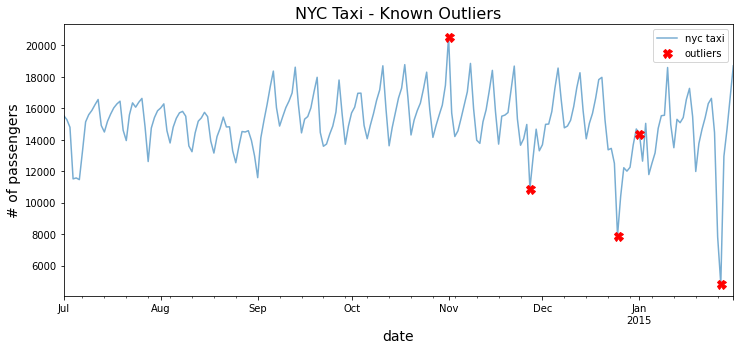

In [7]:
plot_outliers(known_outliers, tx, 'Known Outliers', labels=False)

# Detecting Outliers with PyCaret

In [8]:
from pycaret.anomaly import *
setup = setup(tx, session_id = 1, normalize=True)

,Description,Value
0,session_id,1
1,Original Data,"(215, 1)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(215, 1)"
9,CPU Jobs,-1


In [11]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [12]:
list_of_models = models().index.tolist()[0:8]
list_of_models

['abod', 'cluster', 'cof', 'iforest', 'histogram', 'knn', 'lof', 'svm']

In [13]:
results = {}
for model in list_of_models:
    cols = ['value', 'Anomaly_Score']
    outlier_model = create_model(model, fraction=0.03)
    print(outlier_model)
    outliers = predict_model(outlier_model, data=tx)
    outliers = outliers[outliers['Anomaly'] == 1][cols]
    outliers.sort_values('Anomaly_Score', ascending=False, inplace=True)
    results[model] = {'data': outliers, 'model': outlier_model}

OCSVM(cache_size=200, coef0=0.0, contamination=0.03, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)


In [14]:
for model in results:
    print(f'Model: {model}')
    display(results[model]['data'])

Model: abod


,value,Anomaly_Score
timestamp,,
2014-11-01,20553.500000,-0.002301
2015-01-27,4834.541667,-0.007914
2014-12-26,10397.958333,-3.417724
2015-01-26,7818.979167,-116.341395
2014-12-25,7902.125000,-117.582752
2014-11-27,10899.666667,-122.169590
2014-10-31,17473.354167,-2239.318906


Model: cluster


,value,Anomaly_Score
timestamp,,
2015-01-27,4834.541667,3.657992
2015-01-26,7818.979167,2.113955
2014-12-25,7902.125000,2.070939
2014-11-01,20553.500000,0.998279
2014-12-26,10397.958333,0.779688
2014-11-27,10899.666667,0.520122
2014-11-28,12850.854167,0.382981


Model: cof


,value,Anomaly_Score
timestamp,,
2015-01-27,4834.541667,3.911957
2015-01-26,7818.979167,3.795352
2014-12-25,7902.125000,3.710671
2014-11-01,20553.500000,3.144855
2014-11-27,10899.666667,1.735022
2014-12-19,17827.479167,1.490254
2014-09-27,17801.791667,1.476060


Model: iforest


,value,Anomaly_Score
timestamp,,
2015-01-27,4834.541667,0.249903
2014-11-01,20553.500000,0.194263
2015-01-26,7818.979167,0.133526
2014-12-25,7902.125000,0.131992
2014-12-26,10397.958333,0.101494
2014-11-27,10899.666667,0.050560
2014-11-08,18857.333333,0.020999


Model: histogram


,value,Anomaly_Score
timestamp,,
2014-11-01,20553.500000,3.241689
2015-01-27,4834.541667,3.241689
2014-11-27,10899.666667,3.165679
2014-12-25,7902.125000,3.165679
2014-12-26,10397.958333,3.165679
2015-01-26,7818.979167,3.165679


Model: knn


,value,Anomaly_Score
timestamp,,
2015-01-27,4834.541667,3.137870
2015-01-26,7818.979167,1.593833
2014-12-25,7902.125000,1.587053
2014-11-01,20553.500000,0.957649
2014-12-26,10397.958333,0.607557
2014-11-27,10899.666667,0.347991


Model: lof


,value,Anomaly_Score
timestamp,,
2015-01-27,4834.541667,5.513593
2015-01-26,7818.979167,3.507331
2014-12-25,7902.125000,3.454725
2014-11-01,20553.500000,2.373203
2014-12-26,10397.958333,2.000520
2014-11-27,10899.666667,1.750051


Model: svm


,value,Anomaly_Score
timestamp,,
2015-01-27,4834.541667,44.186298
2015-01-26,7818.979167,42.857763
2014-12-25,7902.125000,42.806322
2014-11-01,20553.500000,38.599467
2014-12-26,10397.958333,34.060369
2014-11-27,10899.666667,28.916175
2014-07-06,11464.270833,21.870766
